In [4]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

![](normal.png)

In [2]:
sp.norm(0,1).pdf(0.2) # 평균 0, 표준편차 1, 0.2일 확률

0.3910426939754559

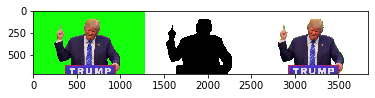

In [3]:
def val_max_cnt(arr):
    values, cnts = np.unique(arr, return_counts=True)
    return values[cnts.argmax()]

def in_range(arr, std, dst):
    is_gte = arr >= std-dst
    is_lte = arr <= std+dst
    return is_gte & is_lte



croma_img = cv2.imread('trump.jpg')
h,s,v = cv2.split(cv2.cvtColor(croma_img, cv2.COLOR_BGR2HSV))

dst = 40
bH = in_range(h, val_max_cnt(h), dst)
bS = in_range(s, val_max_cnt(s), dst)
bV = in_range(v, val_max_cnt(v), dst)
mask = bH & bS & bV

bin_img = np.zeros(croma_img.shape, dtype='uint8')
bin_img[mask] = (255,255,255)

obj_img = croma_img.copy()
obj_img[mask] = 255

result = np.hstack([
    croma_img,
    bin_img,
    obj_img
])
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

In [6]:
t = 7
p = sp.norm(0,1).pdf((9-7)/4) # 평균 9, 테스트 7, 표준편차 4일때
print(p)

0.3520653267642995


(512, 512)


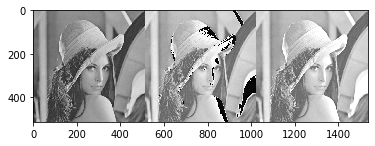

In [32]:
img = cv2.imread('Lena.png', cv2.IMREAD_GRAYSCALE)
print(img.shape)
img2 = img + 50
img3 = img.astype('int') + 50
img3 = np.clip(img3,0,255).astype('uint8')

result = np.hstack([
    img,img2,img3
])
plt.imshow(result, cmap='gray')

(512, 512)


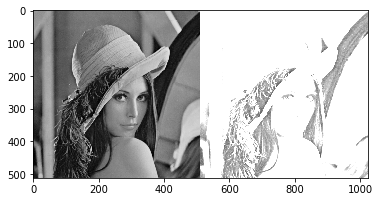

In [6]:
img = cv2.imread('Lena.png', cv2.IMREAD_GRAYSCALE)
print(img.shape)
img2 = img.astype('float') * 3
img2 = np.clip(img2,0,255).astype('uint8')

result = np.hstack([
    img,img2
])
plt.imshow(result, cmap='gray')

In [42]:
lut1 = [x for x in range(10)] 
lut2 = [x+5 for x in range(10)]
lut3 = [x+5 if x+5<10 else 9 for x in range(10)]

lut3

[5, 6, 7, 8, 9, 9, 9, 9, 9, 9]

In [2]:
def addlut(op):
    return np.array([x+op if x+op<255 else 255
                     for x in range(256)]).astype('uint8')

def mullut(op):
    return np.array([x*op if x*op<255 else 255
                     for x in range(256)]).astype('uint8')

def binlut(t):
    return np.array([
        (x>t) * 255 for x in range(256)
    ]).astype('uint8')

def poslut(l):
    return np.array([
        int(x/l) * l for x in range(256)
    ]).astype('uint8')

def gammalut(gamma):
    invGamma = 1.0 / gamma
    return np.array([((i/255.0) ** invGamma) * 255 for i in range(256)]).astype('uint8')

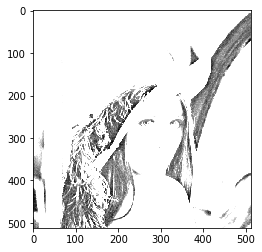

In [53]:
src2 = cv2.LUT(img, mullut(3))
plt.imshow(src2, cmap='gray')

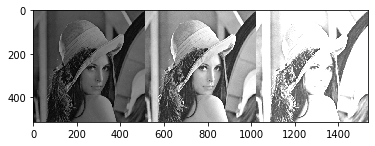

In [55]:
all_ = np.hstack([
    cv2.LUT(img, mullut(0.7)),
    cv2.LUT(img, mullut(1.2)),
    cv2.LUT(img, mullut(2.0))
])
plt.imshow(all_, cmap='gray')

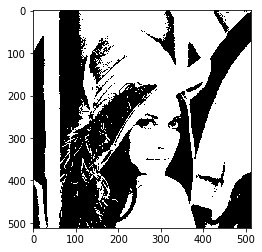

In [64]:
bin_img = cv2.LUT(img, binlut(127))
plt.imshow(bin_img, cmap='gray')

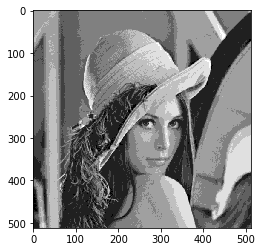

In [82]:
pos_img = cv2.LUT(img, poslut(25))
plt.imshow(pos_img, cmap='gray')

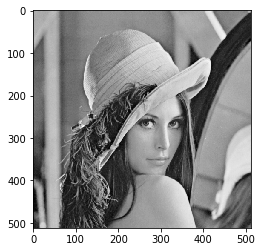

In [13]:
gam_img = cv2.LUT(img, gammalut(1.5))
plt.imshow(gam_img, cmap='gray')

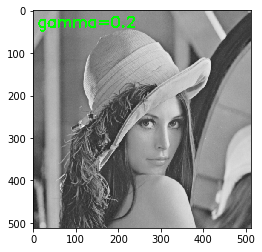

In [18]:
img = cv2.imread('Lena.png', cv2.IMREAD_GRAYSCALE)
col = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

cv2.putText(col, 'gamma=0.2', (10, 40),
            cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0,255,0), 3)
plt.imshow(col)

In [47]:
img = cv2.imread('cat.jpg')
gam_range = range(1, 31, 3)
for gamma in gam_range:
    gamma /= 10
    gam_img = cv2.LUT(img, gammalut(gamma))
    cv2.putText(gam_img, f'gamma={gamma}', (10, 40),
            cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0,255,0), 3)
    cv2.imwrite(f'g{gamma}.jpg', np.hstack([img,gam_img]))
    

In [50]:
from PIL import Image
images = [
    Image.open(f'g{i/10}.jpg') for i in gam_range
]
images
images[0].save('out.gif', save_all=True, append_images=images[1:],
        duration=200, loop=0)


<img src='out.gif?1542'>

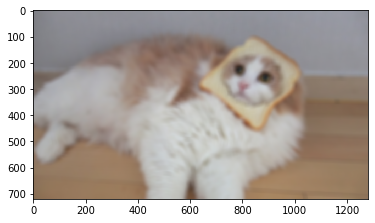

In [55]:
img = cv2.imread('cat.jpg')

K = 19
kernel = np.ones((K,K), np.float32) / (K*K)

filterd = cv2.filter2D(img, -1, kernel)
plt.imshow(cv2.cvtColor(filterd, cv2.COLOR_BGR2RGB))

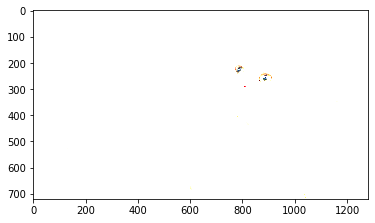

In [58]:
img = cv2.imread('cat.jpg')


kernel = np.array([
    [0,0,0],
    [-1, 8,-1],
    [0,0,0]
])

filterd = cv2.filter2D(img, -1, kernel)
plt.imshow(cv2.cvtColor(filterd, cv2.COLOR_BGR2RGB))